In [1]:
from lcapy import Circuit, t, pi, sin, cos

In [2]:
import sympy as sy
sy.init_printing()

In [3]:
from IPython.display import Math, display
from matplotlib import style
from matplotlib.pyplot import savefig
#style.use('fivethirtyeight')
style.use('ggplot')
%matplotlib inline

In [4]:
from sympy.abc import t

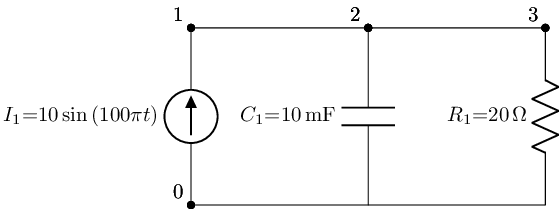

In [5]:
cct = Circuit("""
I1 1 0 {10*sin(2*pi*50*t)}; down
R1 3 0_2 20; down=1.5
C1 2 0_1 10000e-6 0; down
W 1 2; right=1.5
W 2 3; right=1.5
W 0 0_1; right
W 0_1 0_2; right
""")
cct.draw()

In [6]:
print(cct.C1.v.evalf())

Piecewise((0.050647762593032*sin(100*pi*t) - 3.18229277766058*cos(100*pi*t) + 3.18229277766058*exp(-5*t), t >= 0))


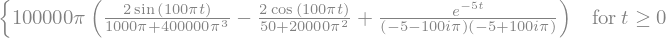

In [7]:
cct.C1.v

<AxesSubplot:xlabel='Time (s)', ylabel='Voltage (V)'>

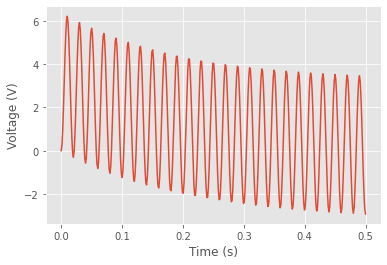

In [8]:
cct.C1.v.force_causal().plot((0, 0.5))

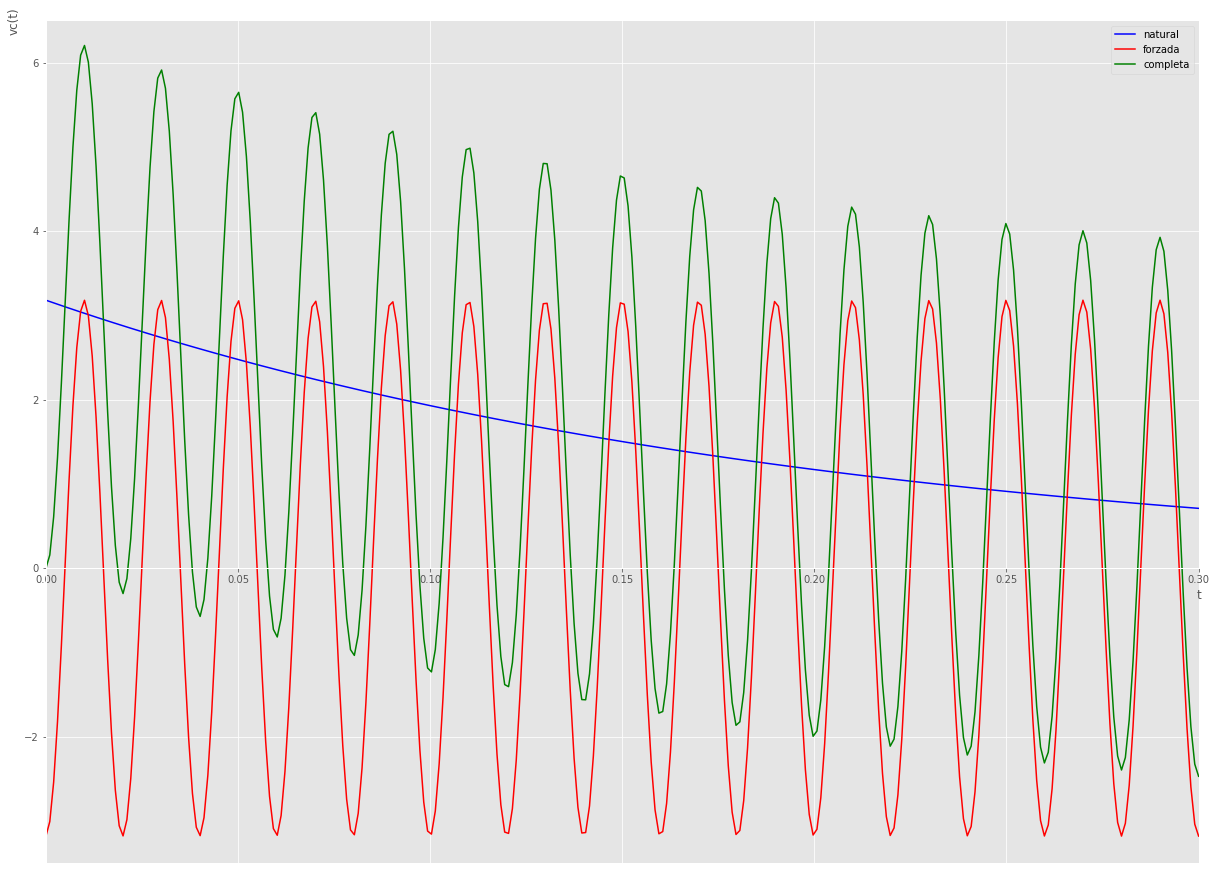

<Figure size 432x288 with 0 Axes>

In [15]:
p1 = sy.plot(3.18229277766058*sy.exp(-5*t), (t, 0, 0.3), xlim=(0,0.3), ylim=(-3.5,6.5), show=False, size=(17,12), line_color='blue', label='natural', legend=True, ylabel='vc(t)')
p2 = sy.plot(0.050647762593032*sy.sin(100*sy.pi*t) - 3.18229277766058*sy.cos(100*sy.pi*t), (t, 0, 0.3, 0.001), adaptive=False, show=False, line_color='red', label='forzada')
p3 = sy.plot(0.050647762593032*sy.sin(100*sy.pi*t) - 3.18229277766058*sy.cos(100*sy.pi*t) + 3.18229277766058*sy.exp(-5*t), (t, 0, 0.3), adaptive=False, show=False, line_color='green', label='completa')
p1.append(p2[0])
p1.append(p3[0])
p1.show()
savefig('guia3_ej16.png')